In [1]:
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
import cartopy.crs as ccrs
from cartopy.util import add_cyclic_point
from mpl_toolkits.basemap import Basemap, addcyclic
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
#import seaborn as sns

In [3]:
SKEdataset=xr.open_dataset('/home/suvarchal/G5NR/SKEdot_merged_90x45.nc')
#http://weather.rsmas.miami.edu/repository/opendap/synth:1142722f-a386-4c17-a4f6-0f685cd19ae3:L0c1TlIvU0tFZG90X21lcmdlZF85MHg0NS5uYw==/entry.das

In [4]:
SKEdataset.data_vars

Data variables:
    KEDOT    (time, lat, lon) float64 -0.03375 -0.08641 -0.1361 -0.1272 ...
    SKEDOT   (time, lat, lon) float64 -0.03215 -0.05416 -0.07719 -0.07138 ...
    SKE      (time, lat, lon) float64 20.37 19.0 18.98 18.9 18.49 18.33 ...
    SKEPREC  (time, lat, lon) float64 7.828e-06 5.117e-06 3.286e-06 ...
    PREC     (time, lat, lon) float64 3.842e-07 2.693e-07 1.732e-07 ...

In [5]:
#kedot,cyc_lon=addcyclic(SKEdataset.KEDOT.mean(dim='time'),SKEdataset.lon)
#prec,cyc_lon=addcyclic(SKEdataset.PREC.mean(dim='time'),SKEdataset.lon)
#lon_2d,lat_2d=np.meshgrid(cyc_lon,SKEdataset.lat)


<a list of 28 text.Text objects>

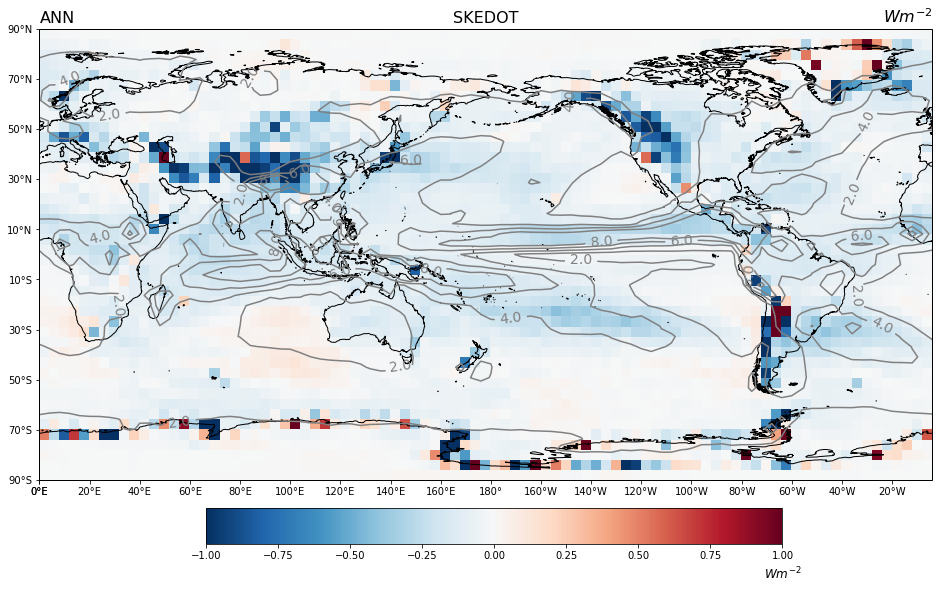

In [6]:
lon_2d,lat_2d=np.meshgrid(SKEdataset.lon,SKEdataset.lat)
kedot=SKEdataset.SKEDOT.mean(dim='time')
prec=SKEdataset.PREC.mean(dim='time')


fig = plt.figure(figsize=(16,10))
ax = fig.add_subplot(111, projection=ccrs.PlateCarree(central_longitude=180))

cax = fig.add_axes([0.27, 0.1, 0.5, 0.05])
ax.set_title('SKEDOT', size=16)
ax.set_title('ANN', size=16,loc="left")
ax.set_title('$W m^{-2}$', size=16,loc="right")

c=ax.pcolormesh(lon_2d,lat_2d,kedot,cmap='RdBu_r',vmin=-1.0,vmax=1.0,transform=ccrs.PlateCarree(central_longitude=0))
plevels=np.arange(0,10,2)
c1=ax.contour(lon_2d,lat_2d,prec*86400,colors='Gray',levels=plevels,transform=ccrs.PlateCarree(central_longitude=0))
ax.coastlines('50m')
ax.set_yticks(np.arange(-90,100,20), crs=ccrs.PlateCarree(central_longitude=180))
ax.set_xticks(np.arange(0,380,20),crs=ccrs.PlateCarree())
lon_formatter = LongitudeFormatter(zero_direction_label=True)
lat_formatter = LatitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)

cb = fig.colorbar(c, cax=cax,orientation='horizontal')
cb.set_label(r'$W m^{-2}$', size='large',position=(1.0,0.04))
plt.clabel(c1,plevels[0::1],inline=1,fmt='%1.1f',fontsize=14)

In [7]:
SKEdataset_seas=SKEdataset.groupby('time.season').mean(dim='time')

In [8]:
SKEdataset_seas.data_vars

Data variables:
    KEDOT    (season, lat, lon) float64 -0.0008527 0.001372 0.001166 ...
    SKEDOT   (season, lat, lon) float64 -0.002848 -0.001975 -0.001493 ...
    SKE      (season, lat, lon) float64 10.25 10.02 9.583 9.156 8.944 8.794 ...
    SKEPREC  (season, lat, lon) float64 2.017e-05 1.904e-05 1.767e-05 ...
    PREC     (season, lat, lon) float64 1.287e-06 1.237e-06 1.19e-06 ...

<a list of 32 text.Text objects>

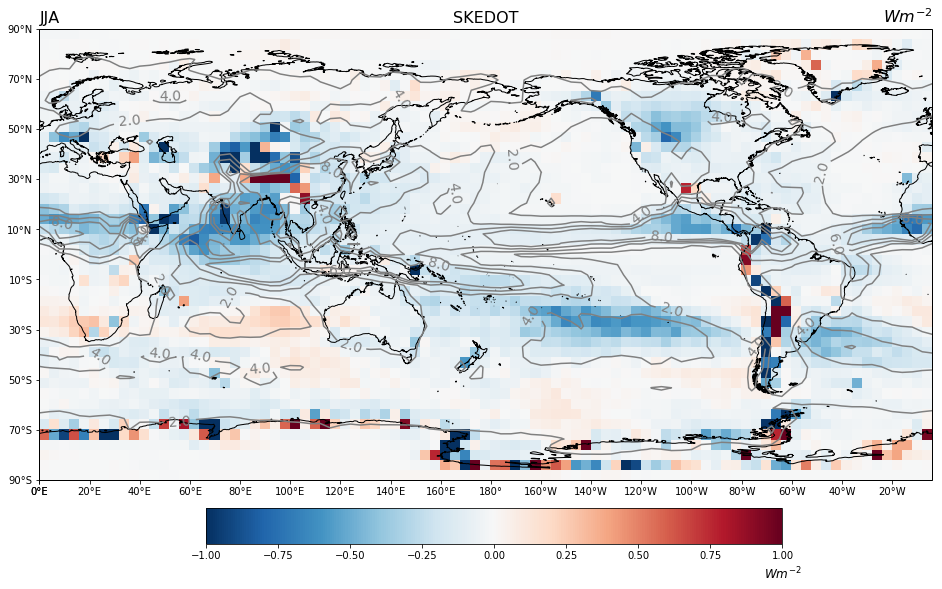

In [9]:
#kedot,cyc_lon=addcyclic(SKEdataset_seas.KEDOT[0,:,:],SKEdataset_seas.lon)
#prec,cyc_lon=addcyclic(SKEdataset_seas.PREC[0,:,:],SKEdataset_seas.lon)
lon_2d,lat_2d=np.meshgrid(SKEdataset_seas.lon,SKEdataset_seas.lat)

fig = plt.figure(figsize=(16,10))
ax = fig.add_subplot(111, projection=ccrs.PlateCarree(central_longitude=180))
kedot=SKEdataset_seas.SKEDOT.sel(season='JJA')
prec=SKEdataset_seas.PREC.sel(season='JJA')
cax = fig.add_axes([0.27, 0.1, 0.5, 0.05])
ax.set_title('SKEDOT', size=16)
ax.set_title('JJA', size=16,loc="left")
ax.set_title('$W m^{-2}$', size=16,loc="right")

c=ax.pcolormesh(lon_2d,lat_2d,kedot,cmap='RdBu_r',vmin=-1.0,vmax=1.0,transform=ccrs.PlateCarree(central_longitude=0))
plevels=np.arange(0,10,2)
c1=ax.contour(lon_2d,lat_2d,prec*86400,colors='Gray',levels=plevels,transform=ccrs.PlateCarree(central_longitude=0))
ax.coastlines('50m')
ax.set_yticks(np.arange(-90,100,20), crs=ccrs.PlateCarree(central_longitude=180))
ax.set_xticks(np.arange(0,380,20),crs=ccrs.PlateCarree())
lon_formatter = LongitudeFormatter(zero_direction_label=True)
lat_formatter = LatitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)

cb = fig.colorbar(c, cax=cax,orientation='horizontal')
cb.set_label(r'$W m^{-2}$', size='large',position=(1.0,0.04))
plt.clabel(c1,plevels[0::1],inline=1,fmt='%1.1f',fontsize=14)

In [10]:
areafile=xr.open_dataset('/home/suvarchal/G5NR/cell_area_90x45.nc')
#http://weather.rsmas.miami.edu/repository/entry/show?entryid=synth%3A1142722f-a386-4c17-a4f6-0f685cd19ae3%3AL0c1TlIvY2VsbF9hcmVhXzkweDQ1Lm5j
lsmask=xr.open_dataset('/home/suvarchal/G5NR/G5NR_90x45_seamask.nc')
#http://weather.rsmas.miami.edu/repository/entry/show?entryid=synth%3A1142722f-a386-4c17-a4f6-0f685cd19ae3%3AL0c1TlIvRzVOUl85MHg0NV9zZWFtYXNrLm5j

## Global average SKEDOT in W/m2 [weighted]

In [11]:
area=areafile.cell_area
areasum=area.sum()
areafrac=area/areasum
#print areafrac.sum() #should be ~1

In [12]:
skedot_mean=SKEdataset.SKEDOT.mean(dim='time')

In [13]:
(skedot_mean*areafrac).sum() #KEDOT is similar

<xarray.DataArray ()>
array(-0.11696287777124266)

## Ocean only average SKEDOT W/m2

In [14]:
#take only ocean
area=areafile.cell_area.where(lsmask.topo==0.0) 
areasum=area.sum(skipna=True)
areafrac=area/areasum
#print(areafrac.sum()) #should be 1

In [15]:
skedot_mean_ocn=skedot_mean.where(lsmask.topo==0.0)

In [16]:
(skedot_mean_ocn*areafrac).sum()

<xarray.DataArray ()>
array(-0.09472640647156175)